## Установка необходимых пакетов и импорт библиотек

In [1]:
!pip3 install anndata
!pip3 install scanpy
!pip3 install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 5.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 2.9 MB/s 
     |████████████████████████████████| 9.4 MB 42.5 MB/s 
     |████████████████████████████████| 88 kB 8.1 MB/s 
     |████████████████████████████████| 965 kB 47.8 MB/s 
     |████████████████████████████████| 295 kB 55.2 MB/s 
     |████████████████████████████████| 1.1 MB 42.9 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=f9aa6db9eb81be5e20226352255f057f97bae3c2f8524fdef435cb3d65ff7b47
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl siz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 21.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.


In [2]:
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap
import os

## Загружаем файлы

In [3]:
# Download CD45- EpCAM+ cells
gsm_list = [
            ('7017', '1395'),
            ('7018', '1396'),
            ('7019', '1398'),
            ('7020', '1458'),
            ('7021', '1459'),
            ('7022', '1539'),
            ('7023', '1540'),
            ('7024', '1541'),
            ('7025', '1542'),
            ('7026', '1544'),
            ('7027', '1545'),
            ('7028', '1546'),
            ('7029', '1646'),
            ('7030', '1647'),
            ('7031', '1648'),
            ('7032', '1649'),
            ('7033', '1751'),
            ('7034', '1753'),
            ('7035', '1792'),
            ('7036', '1793'),
            ('7037', '1795'),
]

for gsm, ab in gsm_list:
  os.system(f"wget -c -nv 'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM278{gsm}/suppl/GSM278{gsm}_AB{ab}.txt.gz' -O '{ab}.txt.gz'")
  os.system(f"gzip -f -d {ab}.txt.gz")

## Объединяем все файлы в один

In [4]:
counts = None
for _, ab in tqdm(gsm_list):
  if counts is not None:
    counts = pd.concat([counts, pd.read_csv(f'{ab}.txt', sep='\t')], axis=1)
  else:
    counts = pd.read_csv(f'{ab}.txt', sep='\t')

counts

  0%|          | 0/21 [00:00<?, ?it/s]

,W291665,W291666,W291667,W291668,W291669,W291670,W291671,W291672,W291673,W291674,...,W432007,W432008,W432009,W432010,W432011,W432012,W432013,W432014,W432015,W432016
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Экспрессия маркерных генов

In [5]:
# choose only cells from the provided file
!gdown --id 1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G
cells = pd.read_csv("thymus_epithel_clusts.txt", sep='\t', index_col=0)
cell_ids = cells.index
counts = counts.loc[:, counts.columns.isin(cell_ids)]
counts

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G
To: /content/thymus_epithel_clusts.txt
100% 42.8k/42.8k [00:00<00:00, 52.0MB/s]


,W291665,W291666,W291668,W291670,W291676,W291677,W291679,W291680,W291683,W291685,...,W431994,W431996,W432001,W432003,W432005,W432006,W432008,W432009,W432011,W432013
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
0610007P08Rik,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
markers = ['Ctsl', 'Psmb11', 'Prss16', 'Ascl1', 'Sox4', 'Ccl21a', 'Apoe', 'Ly6a', 'Ccl21c', 'Aire', 'Hdc', 'Ubd', \
           'Cd52', 'Ccl20', 'Serpinb6a', 'Ly6d', 'Pigr', 'Car8', 'Lcn2', 'Trpm5', 'Avil', 'Gnb3', 'Lrmp']

In [7]:
# normalization (TPM (transcripts per million), FPKM (fragments per kilobase of transcript per million fragments mapped),
# normalized counts using coefficient of variation, intraclass correlation coefficient).
data_normalized = counts / counts.sum() * 10**6

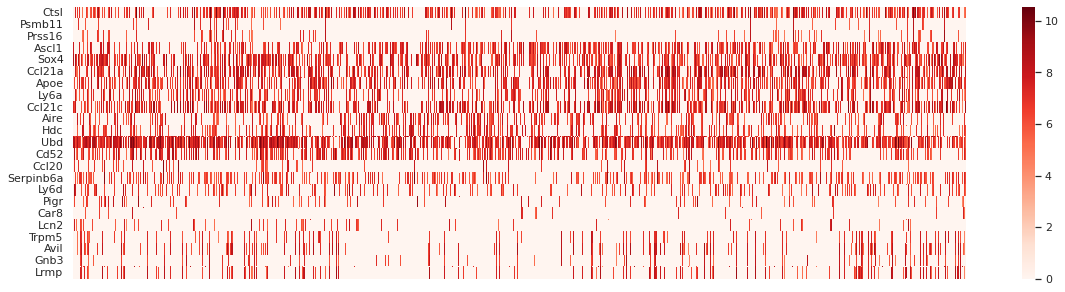

In [8]:
data_normalized_markers = data_normalized.loc[markers]
f, ax = plt.subplots(figsize=(20, 5))
ax = sns.heatmap(np.log(data_normalized_markers + 1), yticklabels=True, xticklabels=False, cmap='Reds')
plt.show()

## Визуализируем все 2341 клетки на UMAP и PCA

In [9]:
# counts_norm - normalized data
counts_norm = data_normalized
adata = ad.AnnData(counts_norm.T)
sc.pp.log1p(adata)
adata.var_names = list(counts_norm.index)
adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]

<ipython-input-9-d27639c70619>:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(counts_norm.T)


In [10]:
# add to metadata cell type provided by authors
cells_type_data = cells.loc[data_normalized.columns, "group"]

In [11]:
# cells_type_data - cell type provided by authors
adata.obs["cell_type"] = list(cells_type_data)

In [12]:
sc.pp.pca(adata, n_comps=50)

In [13]:
colors = ['red', 'green', 'black', 'pink', 'orange']
cmap = get_cmap(ListedColormap(colors))

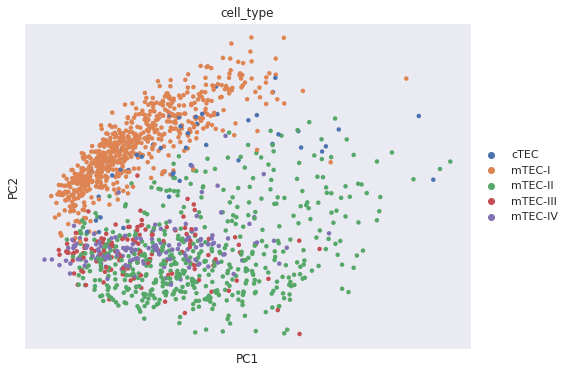

In [14]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.pca(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)

In [15]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

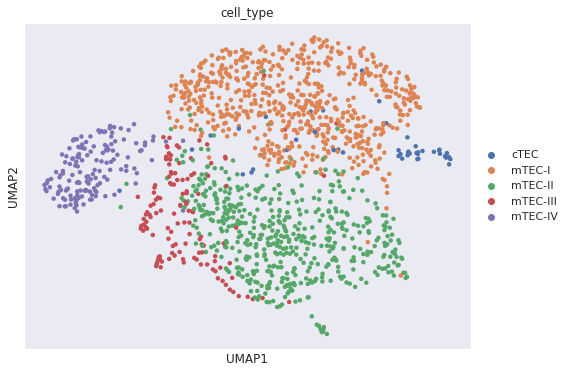

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.umap(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)
plt.show()

## Бонусная часть

In [17]:
! gdown 1jDnstauvQvZsm_89saoUKTVykSicZPc2
SRR2038194 = pd.read_csv("SRR2038194.gene_name.counts", sep='\t', names=["Gene", "Counts"], index_col=0)
! gdown 1jMW6oEUJLk2snJOnxgRGBwVOjcmYrThe
SRR2038195 = pd.read_csv("SRR2038195.gene_name.counts", sep='\t', names=["Gene", "Counts"], index_col=0)

Downloading...
From: https://drive.google.com/uc?id=1jDnstauvQvZsm_89saoUKTVykSicZPc2
To: /content/SRR2038194.gene_name.counts
100% 585k/585k [00:00<00:00, 129MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jMW6oEUJLk2snJOnxgRGBwVOjcmYrThe
To: /content/SRR2038195.gene_name.counts
100% 590k/590k [00:00<00:00, 118MB/s]


In [18]:
#Провести нормализацию bulk RNA-seq данных
SRR2038194_normalized = SRR2038194 / SRR2038194.sum() * 10**6
SRR2038195_normalized = SRR2038195 / SRR2038195.sum() * 10**6

In [19]:
#Для каждого гена берем среднее значение TPM по двум репликам bulk RNA-seq
mean_bulk_normalized = pd.concat([SRR2038194_normalized, SRR2038195_normalized], axis=1).mean(axis=1)

In [20]:
#Для каждого гена берем среднее значение TPM по всем клеткам scRNA-seq (подгруппа  mTEC-IV)
mark = set(cells.loc[cells['group'] == 'mTEC-IV'].index) & set(data_normalized.columns)
mean_scRNAseq_normalized = data_normalized[mark].mean(axis=1)

In [49]:
#Ccl21c нет в bulk, убрали из маркеров
markers_comp = ['Ctsl', 'Psmb11', 'Prss16', 'Ascl1', 'Sox4', 'Ccl21a', 'Apoe', 'Ly6a', 'Aire', 'Hdc', 'Ubd', \
           'Cd52', 'Ccl20', 'Serpinb6a', 'Ly6d', 'Pigr', 'Car8', 'Lcn2', 'Trpm5', 'Avil', 'Gnb3', 'Lrmp']

In [52]:
#Подготовить подвыборку генов для анализа
common_genes = set(mean_bulk_normalized.index) & set(mean_scRNAseq_normalized.index)
mean_normalized = pd.DataFrame(
    data = {
        'Bulk': mean_bulk_normalized.loc[common_genes],
        'Single-cell': mean_scRNAseq_normalized.loc[common_genes]
    }
)

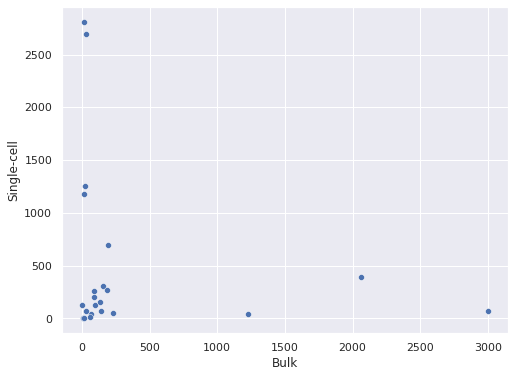

In [53]:
#Можно взять все маркерные гены из основной части задания
#Для выбранного набора генов рисуем график с точками, где каждая точка это 1 ген, координаты -- это средняя экспрессия гена в bulk (ось OX) и средняя экспрессия в mTEC-IV (ось OY)
f, ax = plt.subplots(figsize=(8, 6))
scatter_data = mean_normalized.loc[markers_comp]
sns.scatterplot(data=scatter_data, x="Bulk", y="Single-cell", ax=ax)

In [65]:
#100-200 наиболее высоко-экспрессированных генов как в bulk, так и scRNA
mean_normalized['mean'] = mean_normalized[['Bulk', 'Single-cell']].mean(axis=1)
mean_normalized.sort_values('mean', ascending=False, inplace=True)
mean_normalized_max_mean = mean_normalized.head(100)
genes_max_mean = list(mean_normalized_max_mean.index)

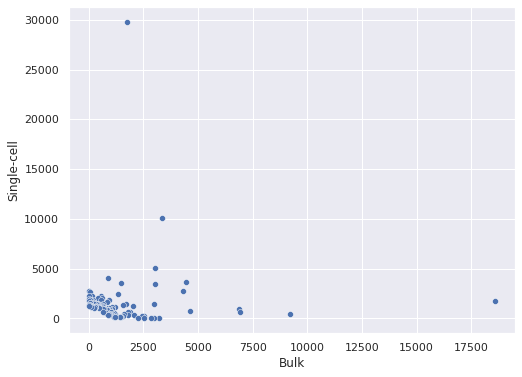

In [67]:
#Для выбранного набора генов рисуем график с точками, где каждая точка это 1 ген, координаты -- это средняя экспрессия гена в bulk (ось OX) и средняя экспрессия в mTEC-IV (ось OY)
f, ax = plt.subplots(figsize=(8, 6))
scatter_data = mean_normalized.loc[genes_max_mean]
sns.scatterplot(data=scatter_data, x="Bulk", y="Single-cell", ax=ax)